## Heart Disease Clustering

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes but, in this lab, we will only use 4 of them. These are:

1. age (Age of the patient in years).
2. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)).
3. chol (serum cholesterol in mg/dl).
4. thalach: maximum heart rate achieved.

Link to dataset describtion from UCI: https://archive.ics.uci.edu/dataset/45/heart+disease


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
# Create a function to load the heart disease dataset

def load_heart_disease():
    '''Load and pre-process heart disease data

    if processed.hungarian.data file is not present.

    it will be downloaded from
    https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data

    return: data(DataFrame)

    '''

    import os
    import requests


    file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
    file_name = file_url.split('/')[-1]

    if not os.path.isfile(file_name):
        print('Downloading from {}'.format(file_url))
        r = requests.get(file_url)
        with open(file_name,'wb') as output_file:
            output_file.write(r.content)

    data = pd.read_csv(file_name,
                   na_values='?',
                   names=[ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                            'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                            'ca', 'thal', 'num'])

    data = data[['age', 'trestbps', 'chol', 'thalach']] # we will use these fatures only
    data = data.dropna()

    return data

In [20]:
# Create a dataframe and load the dataset into it.
df = load_heart_disease()

# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   trestbps  270 non-null    float64
 2   chol      270 non-null    float64
 3   thalach   270 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.5 KB


In [21]:
# Use .describe to show some statistics of the data
df.describe()

,age,trestbps,chol,thalach
count,270.000000,270.000000,270.000000,270.000000
mean,47.777778,132.488889,250.637037,139.155556
std,7.803980,17.563635,67.693394,23.486251
min,28.000000,92.000000,85.000000,82.000000
25%,42.000000,120.000000,209.000000,122.000000
50%,49.000000,130.000000,243.000000,140.000000
75%,54.000000,140.000000,281.750000,155.000000
max,65.000000,200.000000,603.000000,190.000000


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

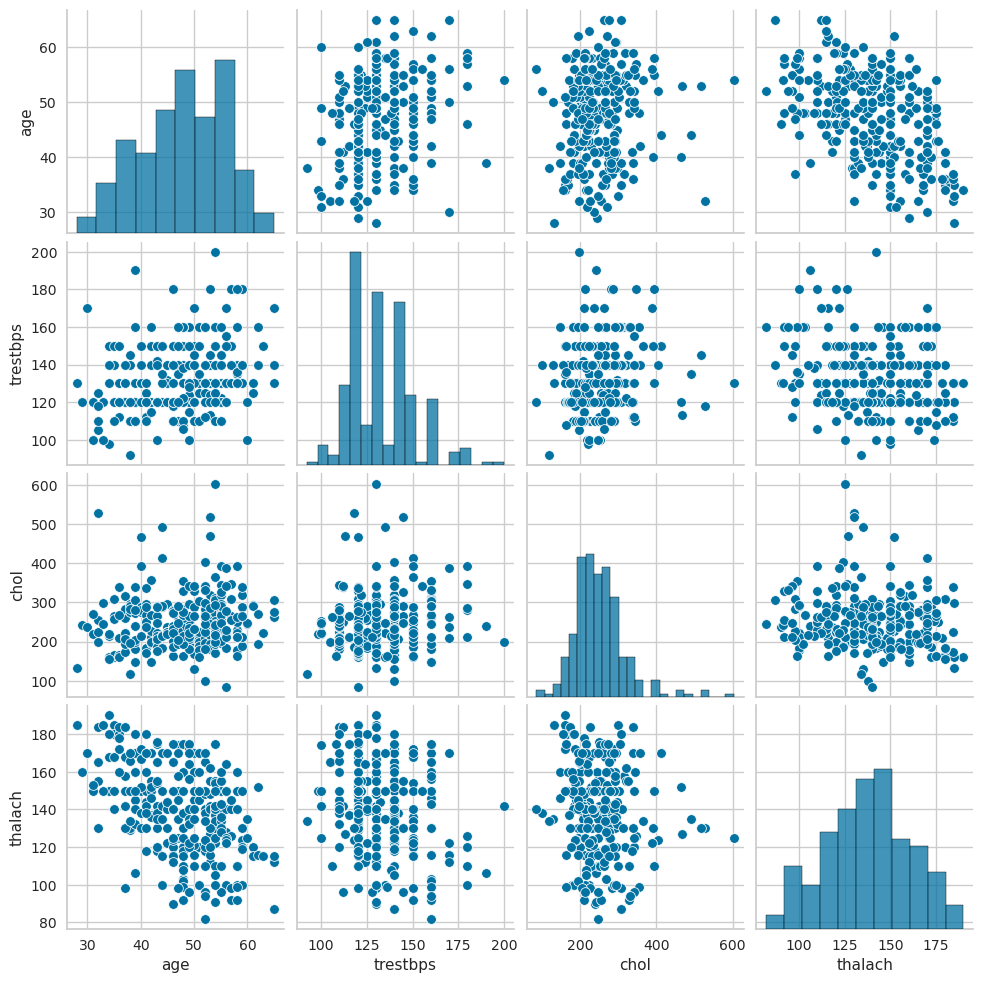

In [22]:
# Use pairplot from seaborn to see the how the features are distributed against each other
sns.pairplot(df)

## K-means clustering

There are a few questions that we must answer before we start clustering:

1. Do we need to process the data first?
1. How many clusters should we use?
1. Which method should we use?

In [23]:
# Use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
df = load_heart_disease()
df_scaled = df.copy()  # get a copy of the original dataframe

scaler = StandardScaler()
# fit the df_scaled into the scaler
scaler.fit(df_scaled)
# Create a dataframe that has the scaled data
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)

/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

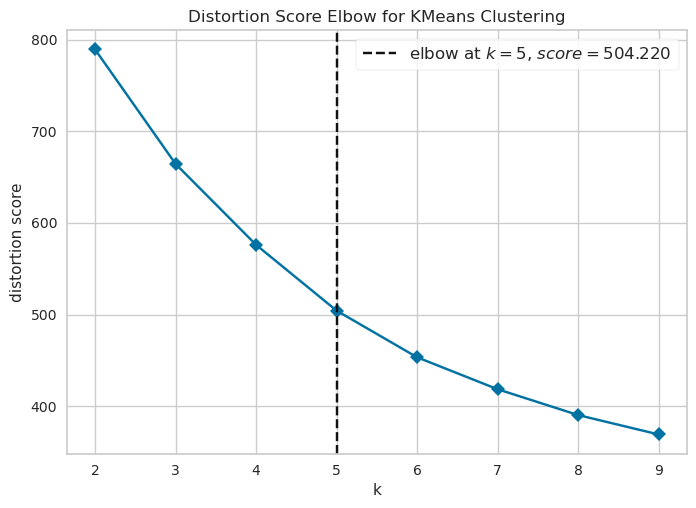

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [24]:
# Use the kelbow visualizer to check how many clusters we have (use the scaled data). Use metric='distortion'
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

# Qualitative colour palette
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10), metric='distortion', timings=False)

/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

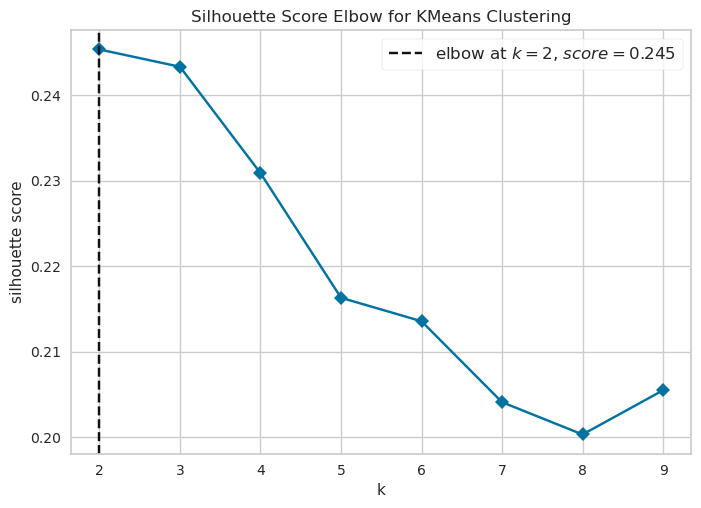

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 metric='silhouette', timings=False)

In [25]:
# Use the kelbow visualizer to check how many clusters we have. Use metric='silhouette'
kelbow_visualizer(KMeans(random_state=0), df_scaled, k=(2,10), metric='silhouette', timings=False)

/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

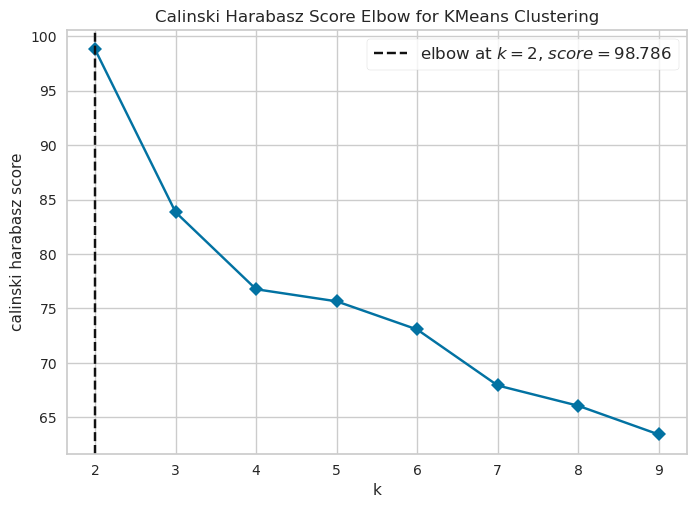

KElbowVisualizer(ax=<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 metric='calinski_harabasz', timings=False)

In [26]:
# Use the kelbow visualizer to check how many clusters we have. Use metric='calinski_harabasz'
kelbow_visualizer(KMeans(random_state=0), df_scaled, k=(2,10), metric='calinski_harabasz', timings=False)

In [27]:
# Apply the k-means clustering technique on the scaled data. Use any number of clusters between 2-5 clusters. I will be using 3 clusters. Use random_state = 54.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=54)

# fit the data here
kmeans.fit(df_scaled)

# Add a column to the dataframe 'df' called 'clusters' and assign kmeans.labels_ to it.
df['clusters'] = kmeans.labels_
# Convert the clusters column to category data type.
df['clusters'] = df['clusters'].astype('category') # Makes seaborn use qualitative color palette

/home/mik/.conda/envs/ensf-ml/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# check the dtypes of the dataframe 'df'
df.dtypes

age            int64
trestbps     float64
chol         float64
thalach      float64
clusters    category
dtype: object

In [29]:
# Calculate the centers of each column/feature and cluster using the unscaled data and the scaled data centers.
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_scaled.columns)
centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)

# view the centers.
centers

,age,trestbps,chol,thalach
0,49.391304,152.413043,337.304348,132.826087
1,52.779528,131.212598,234.811024,126.685039
2,40.463918,124.711340,230.257732,158.484536


In [30]:
# view the centers_scaled
centers_scaled

,age,trestbps,chol,thalach
0,0.207141,1.136505,1.282670,-0.269997
1,0.642113,-0.072802,-0.234224,-0.531957
2,-0.938937,-0.443643,-0.301612,0.824520


<Axes: xlabel='age', ylabel='trestbps'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

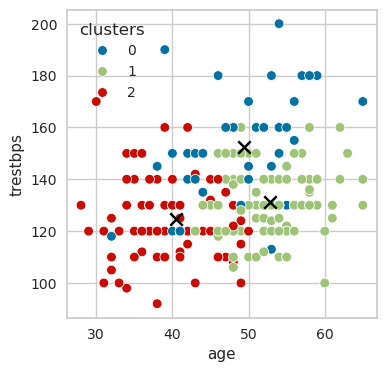

In [31]:
# plot a scatter plot visualizing the 'trestbps' vs. 'age' along with the centers for the unscaled data
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='age', y='trestbps', hue='clusters', data=df)

centers.plot.scatter(x='age', y='trestbps', ax=ax, marker='x', s=80, color='black')

Counter({1: 127, 2: 97, 0: 46})


Text(0.5, 1.0, 'Cluster size distribution')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

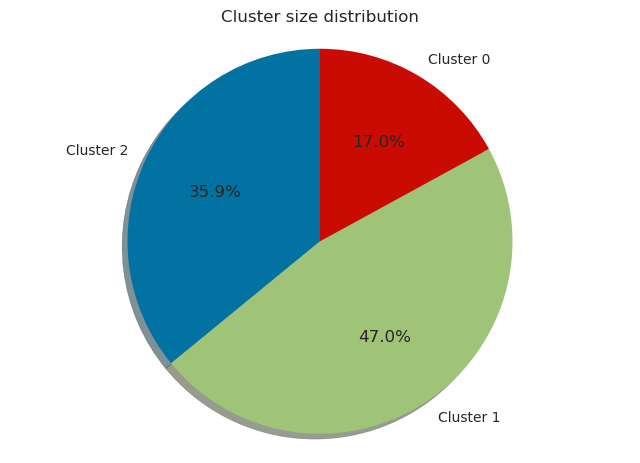

In [32]:
# plot a pie plot to show the cluster size distribution. (Code is written already here)
from collections import Counter
counts = Counter(kmeans.labels_)
print(counts)
fig1, ax1 = plt.subplots()
ax1.pie(counts.values(), labels=[f'Cluster {i}' for i in counts.keys()], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Cluster size distribution')

**Note:** Clusters are not really balanced, one cluster takes half of the patients.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

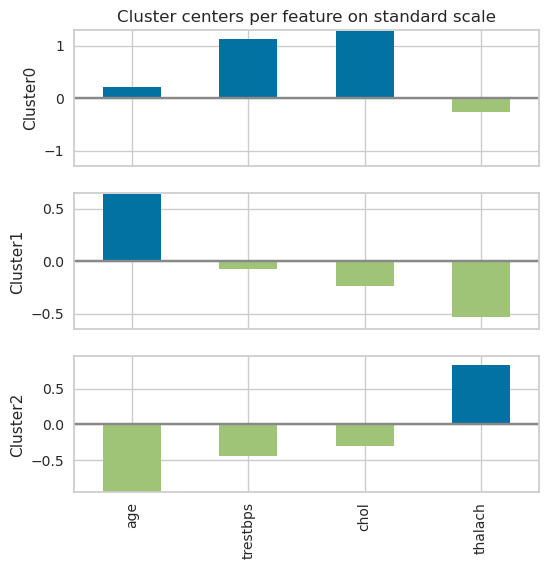

In [33]:
# Create subplots of all the features in each cluster using the scaled data centers. (Code is written already here)
f, axes = plt.subplots(kmeans.n_clusters, 1, figsize=(6, 6), sharex=True)

for i, ax in enumerate(axes):
    center = centers_scaled.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l>0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster{i}')
    ax.set_ylim(-maxPC, maxPC)
    if i == 0:
        ax.set_title('Cluster centers per feature on standard scale')


**Note:** Typically, it is adviced to back transform the centers to original scale. It seems to me that leaving them on the standard scales helps interpretation.

For example, in the plot above, _Cluster 0_ contains patients with age well bellow the average -> young individuals; _Cluster 1_ on the other hand has patients with age well above average -> older individuals. Finally, _Cluster 2_ has average age patients with high cholesterol and high blood pressure.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

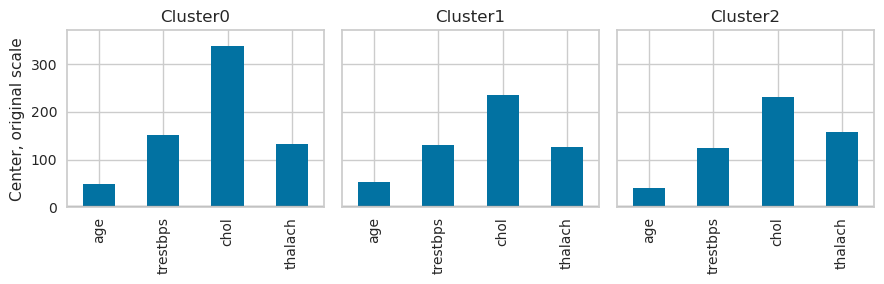

In [34]:
# Create subplots of all the features in each cluster using the unscaled data centers.

f, axes = plt.subplots(1, kmeans.n_clusters, figsize=(9, 3), sharey=True)

overall_max = centers.max().max()

for i, ax in enumerate(axes):
    center = centers.loc[i, :]

    colors = ['C0' if l>0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_title(f'Cluster{i}')
    ax.set_ylim(0, 1.1*overall_max)
    if i == 0:
        ax.set_ylabel('Center, original scale')

plt.tight_layout()